In [68]:
# table of contents

#1. PCA on digits for visualization

import numpy as np
import pylab as py

%matplotlib inline

In [69]:
#digit recognition setup...

from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print ("classes: %r" % list(np.unique(y)))

n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


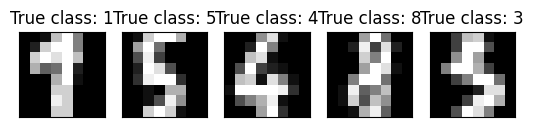

In [70]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        py.subplot(1, data.shape[0], (i + 1))
        py.imshow(data[i].reshape(shape), interpolation=interpolation)
        py.title(labels[i])
        py.xticks(()), py.yticks(())
        py.gray()
        
subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8,8))

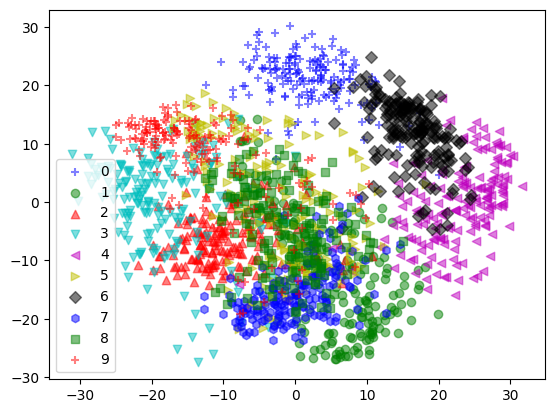

In [78]:
#1. PCA on digits for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_pca = pca.fit_transform(X)

x_pca.shape

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    py.scatter(x_pca[y == i, 0], x_pca[y == i, 1],
       c=c, marker=m, label=i, alpha=0.5)

_ = py.legend(loc='best')
                     
                                       

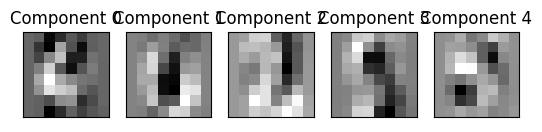

In [72]:
labels = ['Component %d' % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8, 8))

compressed images of first 8 digits
with this many PCA components: [1, 2, 3, 5, 10, 20, 40, 64]


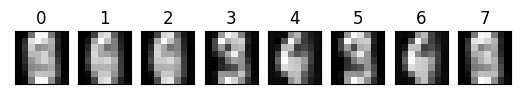

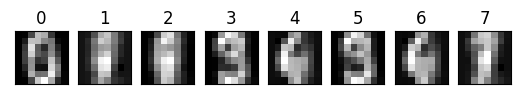

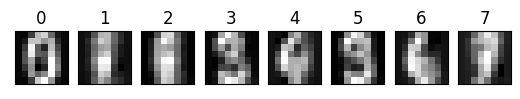

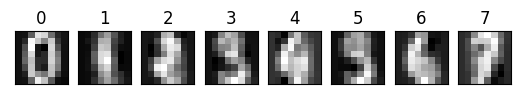

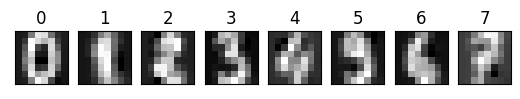

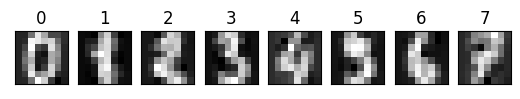

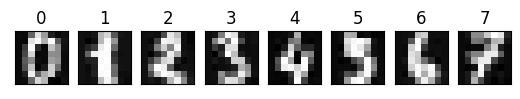

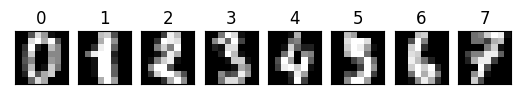

In [73]:
#2. PCA digits for compression

n= 8 # number of digits for demonstration
dims = [1,2,3,5,10,20,40,64]
print('compressed images of first',n,'digits')
print('with this many PCA components:', dims)
for d in dims: #dimensionalityh for compressed signal
    pca = PCA(n_components=d)
    pca.fit_transform(X)
    reduced_X = pca.transform(X[0:n]) # the reduced dimensionality
    recovered_X = pca.inverse_transform(reduced_X)
    py.figure()
    plot_gallery(recovered_X, y[0:n], shape=(8, 8))

In [74]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have already loaded your dataset in variable X

# Fit PCA with the desired number of components (e.g., 64 for 8x8 images)
pca = PCA(n_components=64)
pca.fit(X)

# Print the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
for i, evr in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {evr * 100:.2f}%")

# Calculate the cumulative explained variance for the first two components
first_two_explained_variance = np.sum(explained_variance_ratio[:2]) * 100
print(f"\nThe cumulative explained variance for the first two components: {first_two_explained_variance:.2f}%")


Component 1: 14.89%
Component 2: 13.62%
Component 3: 11.79%
Component 4: 8.41%
Component 5: 5.78%
Component 6: 4.92%
Component 7: 4.32%
Component 8: 3.66%
Component 9: 3.35%
Component 10: 3.08%
Component 11: 2.37%
Component 12: 2.27%
Component 13: 1.82%
Component 14: 1.77%
Component 15: 1.47%
Component 16: 1.41%
Component 17: 1.32%
Component 18: 1.25%
Component 19: 1.02%
Component 20: 0.91%
Component 21: 0.89%
Component 22: 0.80%
Component 23: 0.77%
Component 24: 0.72%
Component 25: 0.70%
Component 26: 0.60%
Component 27: 0.58%
Component 28: 0.52%
Component 29: 0.49%
Component 30: 0.43%
Component 31: 0.37%
Component 32: 0.35%
Component 33: 0.34%
Component 34: 0.33%
Component 35: 0.31%
Component 36: 0.29%
Component 37: 0.26%
Component 38: 0.23%
Component 39: 0.22%
Component 40: 0.21%
Component 41: 0.19%
Component 42: 0.16%
Component 43: 0.15%
Component 44: 0.14%
Component 45: 0.12%
Component 46: 0.11%
Component 47: 0.10%
Component 48: 0.08%
Component 49: 0.06%
Component 50: 0.04%
Compon

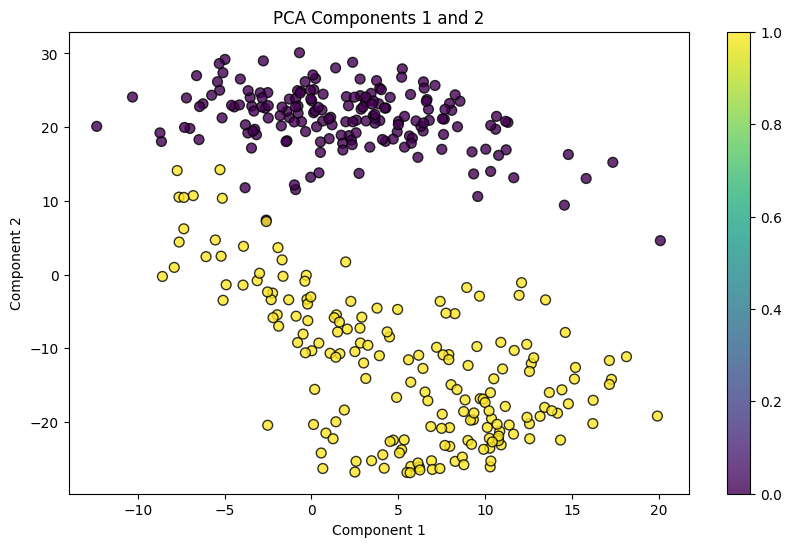

In [75]:
import matplotlib.pyplot as plt

# Fit PCA with the desired number of components (e.g., 3 for this example)
pca = PCA(n_components=3)
pca.fit(X)

# Transform the data
reduced_X = pca.transform(X)

# Filter the data to only include samples with labels 0 and 1
filtered_indices = np.where((y == 0) | (y == 1))
X_filtered = reduced_X[filtered_indices]
y_filtered = y[filtered_indices]

# Create a scatter plot of the first three components
plt.figure(figsize=(10, 6))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap='viridis', marker='o', s=50, edgecolors='k', alpha=0.8)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA Components 1 and 2")
plt.colorbar()
plt.show()


In [76]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))

ModuleNotFoundError: No module named 'sklearn.cross_validation'